A certain company uses a system based on fuzzy rules to support decision making. The  subset of the rules makes a recommendation on whether or not to invest in improving the informatization of the sector in terms of three parameters: sales growth , the overhead of employee services and the current level of informatization.

The input variables of the set of rules and their linguistic values are:
*  **Sales Variation (V)** with values decreasing(diminuindo), stable(estável), increasing(aumentando);
*  **Service Overload (S)** with low(baixa), medium(média), high(alta);
*  **Informatization Level (I)** with bad(ruim), average(médio), good(bom). 

The output variable of the set of rules and their linguistic values are:
*  **Investment recommendation (R)**  with slight(leve), medium(média) and strong(forte).

The input variable Sales Variation has domain [-100,100]. The other input and output variables are defined in domain [0,100], and all indicate percentage.

# Steps 1 e 2: 
* **Inputs:**  V = 55, S = 60 e I = 85.
* **Fuzzification:**  Pertinence Functions (triangular and trapezoidal).
Fuzzy sets - This step consists in transform data crisp in data fuzzy.  
![image.png](attachment:image.png)


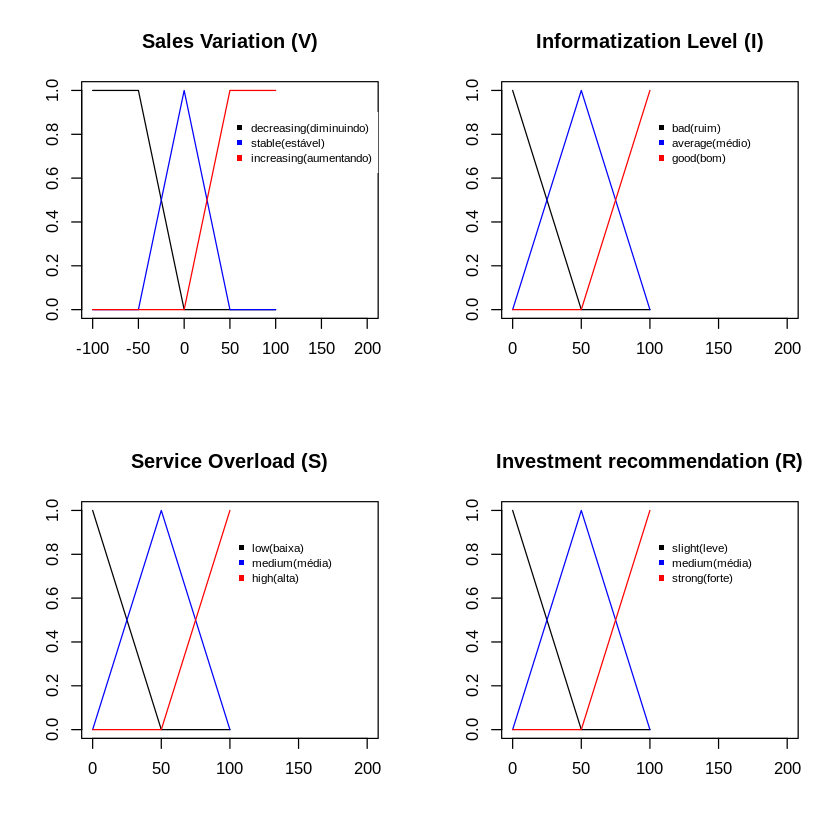

In [9]:
# PERTINENCE FUNCTIONS
trapezoidal <- function(x,a,m,n,b) {
  
  pert<-1:1
  i<-1
  for (i in 1:length(x)) {
        if (x[i] < a) {
              pert[i] = 0  
              } else if (x[i] >= a && x[i] < m) {
              pert[i] = (x[i]-a) / (m-a)  
              } else if (x[i] >= m && x[i] < n) {
              pert[i] = 1
               } else if (x[i] >= n && x[i] <= b ) {
              pert[i] = (b-x[i]) / (b-n)
              } else if (x[i] > b) {
              pert[i] = 0
              }}
   return (pert)   
 }

triangular <- function(x,a,m,b) {

  pert<-1:1  

  i<-1
  
  for (i in 1:length(x)) {
    if (x[i] < a) {
      pert[i] <-0
    } else if (x[i] >= a && x[i] < m) {
      pert[i] <- (x[i] - a) / (m - a)
    } else if (x[i] >= m && x[i] <= b) {
      pert[i] <- (b - x[i]) / (b-m)
    } else if (x[i] > b) {
      pert[i] <- 0
    }
    
  }
  return(pert)
  
}

####FUZZIFICATION

#Sales Variation (V)
#Domain V <- xv
xv<- c(-100:100)
V_Diminuindo<- trapezoidal(xv,-100,-100,-50,0)  # decreasing 
V_Estavel<-triangular(xv,-50,0,50)             #stable
V_Aumentando<-trapezoidal(xv,0,50,100,100)     #increasing
 
#Informatization Level (I)
#dominio I<- xi
xi<- c(0:100)
I_Ruim<- triangular(xi,0,0,50)   #bad
I_Medio<- triangular(xi,0,50,100) #average
I_Bom<-triangular(xi,50,100,100)  #good

#Service Overload (S)
#Domain S<- xs
xs<- c(0:100)
S_Baixa<- triangular(xi,0,0,50)   #low
S_Media<- triangular(xi,0,50,100) #medium
S_Alta<-triangular(xi,50,100,100) #high

#Investment recommendation (R)
#Domain R<- xr
xr<- c(0:100)
R_Leve<- triangular(xi,0,0,50)  #slight
R_Media<- triangular(xi,0,50,100) #medium
R_Forte<-triangular(xi,50,100,100) #strong

###################################################Insert 1 in NaN
V_Aumentando[length(V_Aumentando)] = 1
I_Bom[length(I_Bom)] = 1
S_Alta[length(S_Alta)] = 1
R_Forte[length(R_Forte)] = 1

##############PLOT OF PERTINENCES
#Sales Variation (V)
par(mfrow=c(2,2))
plot(xv, V_Diminuindo, type="l", ylim=c(0,1),xlim=c(-100,200), xlab="",ylab="", 
     main="Sales Variation (V)")
lines(xv, V_Estavel, col="blue")
lines(xv,V_Aumentando, col="red")
legend(48, 0.9, legend = c("decreasing(diminuindo)", "stable(estável)", "increasing(aumentando)"), 
       col = c("black","blue","red"),cex = 0.7, pch = 15,  box.lty=0)


#Informatization Level (I)
plot(xi, I_Ruim, type="l", ylim=c(0,1), xlim=c(0,200), xlab="",ylab="",main="Informatization Level (I)")
lines(xi, I_Medio, col="blue")
lines(xi,I_Bom, col="red")
legend(100, 0.9, legend = c("bad(ruim)", "average(médio)", "good(bom)"), 
       col = c("black","blue","red"),cex = 0.7, pch = 15,  box.lty=0)

#Service Overload (S)
plot(xs, S_Baixa, type="l", ylim=c(0,1),xlim=c(0,200), xlab="",ylab="",main="Service Overload (S)")
lines(xs, S_Media, col="blue")
lines(xs,S_Alta, col="red")
legend(100, 0.9, legend = c("low(baixa)", "medium(média)", "high(alta)"), 
       col = c("black","blue","red"),cex = 0.7, pch = 15,  box.lty=0)

#Investment recommendation (R)
plot(xr, R_Leve, type="l", ylim=c(0,1),xlim=c(0,200), xlab="",ylab="",main="Investment recommendation (R)")
lines(xr, R_Media, col="blue")
lines(xr,R_Forte, col="red")
legend(100, 0.9, legend = c("slight(leve)", "medium(média)", "strong(forte)"), 
       col = c("black","blue","red"),cex = 0.7, pch = 15,  box.lty=0)


# Step 3:
**Rule creation:** quantity of rules, quantity of antecedents, structure of rules, type of consequent, weights of rules.

The set of rules to be considered is:

* If V is increasing and S is high and I is good then R is strong;
* If V is increasing and S is average and I is good then R is average;
* If V is increasing and S is low and I is good then R is slight;
* If V is increasing and S is average and I is bad then R is strong.

# Step 4:
* **Fuzzy Inference:**  I used T- norm(min) in the antecedents because the rules are intersections,  and I used Mamdani  and Larsen in the consequents. 

In [10]:
#setting the inputs   
V_Aum<- V_Aumentando[156] #V increasing - input 55
S_Alt<- S_Alta[61] #  S high - input 60
S_Med<- S_Media[61] # S average- input 60
S_Bai<- S_Baixa[61] # S low - input  60
I_Bo<- I_Bom[86] # I good - input 85
I_Rui<- I_Ruim[86] # I bad - input 85

####T-norm 
#If V is increasing and S is high and I is good then R is strong;
TnormR1<- min(V_Aum,S_Alt,I_Bo)
# If V is increasing and S is average and I is good then R is average;
TnormR2<- min(V_Aum, S_Med,I_Bo)
#If V is increasing and S is low and I is good then R is slight;
TnormR3<- min(V_Aum, S_Bai,I_Bo)
#If V is increasing and S is average and I is bad then R is strong.
TnormR4<- min(V_Aum, S_Med,I_Rui)
###########Mamdani 
######RULE1 
#If V is increasing and S is high and I is good then R is strong;
Mamdani1<-c()
for(i in 1:length(R_Forte)){
Mamdani1[i]<- min(TnormR1, R_Forte[i])
}
######RULE2
# If V is increasing and S is average and I is good then R is average;
Mamdani2<-c()
for(i in 1:length(R_Media)){
Mamdani2[i]<- min(TnormR2, R_Media[i])
}
######RULE3
#If V is increasing and S is low and I is good then R is slight;
Mamdani3<-c()
for(i in 1:length(R_Leve)){
Mamdani3[i]<- min(TnormR3, R_Leve[i])
}
######RULE4
#If V is increasing and S is average and I is bad then R is strong.
Mamdani4<-c()
for(i in 1:length(R_Forte)){
Mamdani4[i]<- min(TnormR3, R_Forte[i])
}


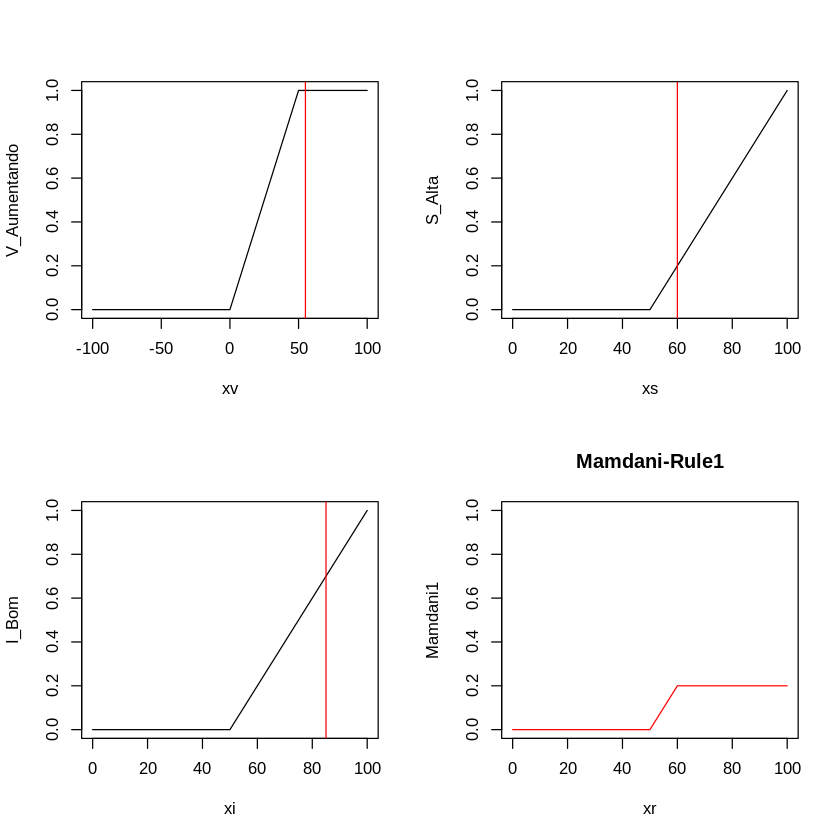

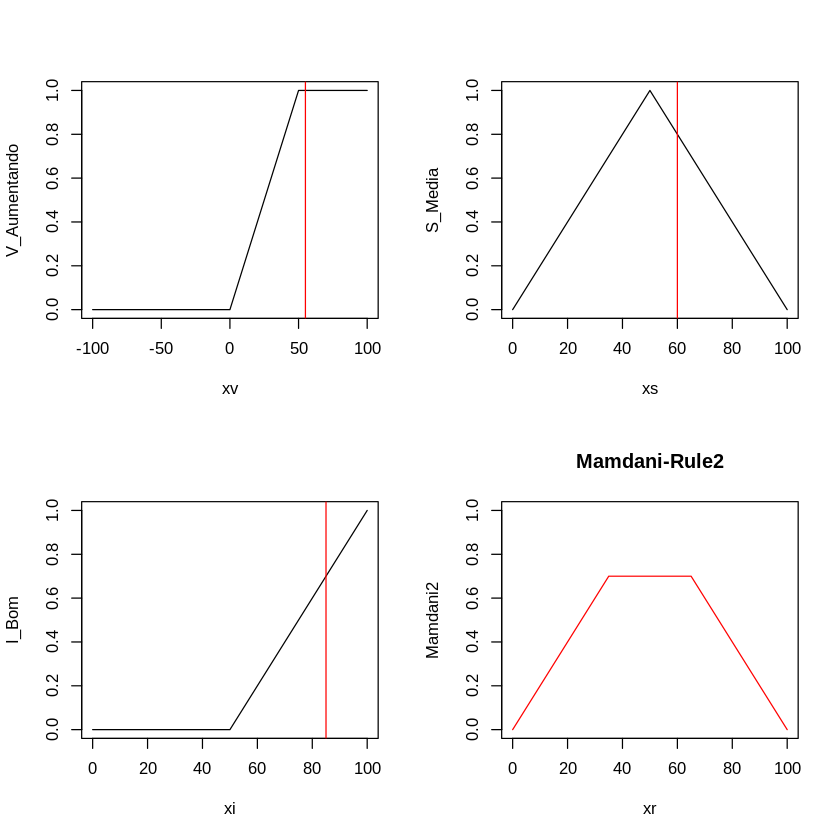

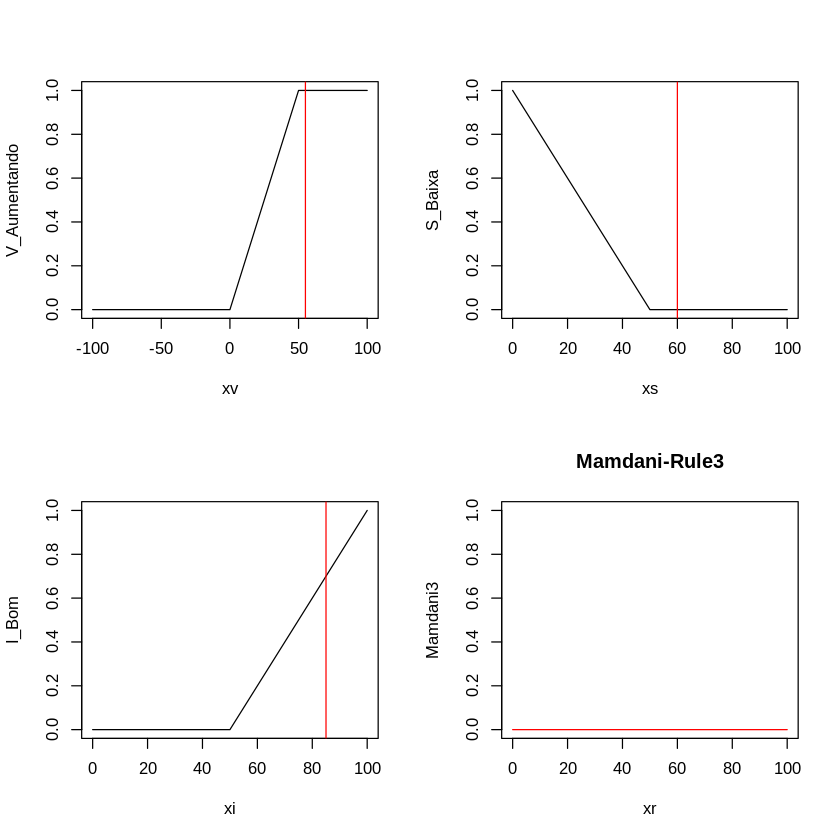

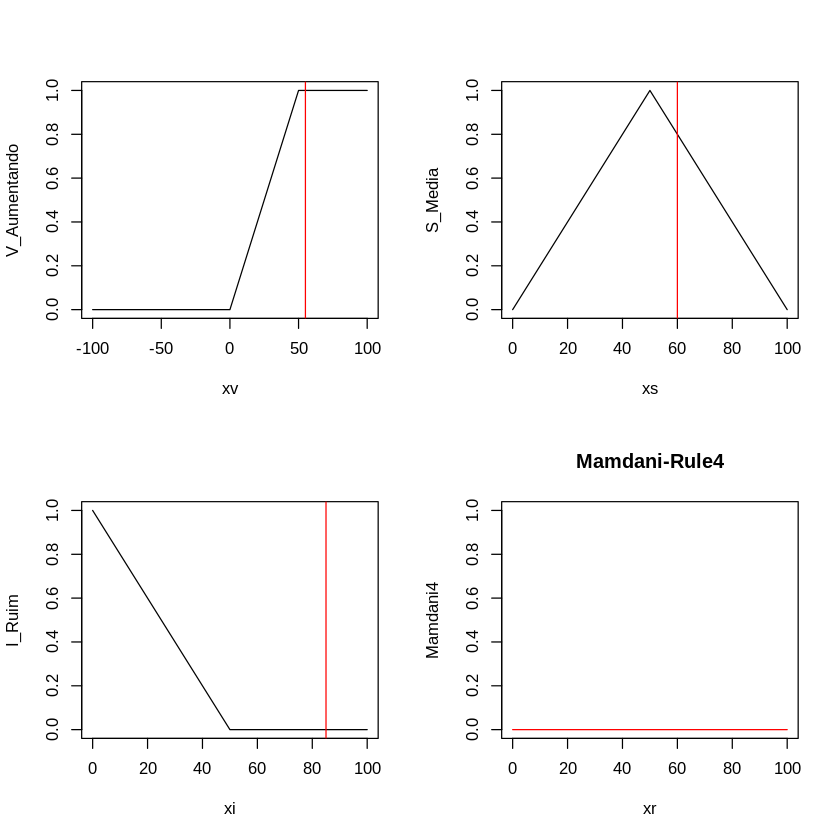

In [11]:
######PLOTS
#Mamdani RULE1
par(mfrow=c(2,2))
plot(xv, V_Aumentando, type="l", ylim=c(0,1))
abline(v=55, col="red")
plot(xs, S_Alta, type="l", ylim=c(0,1))
abline(v=60,col="red")
plot(xi, I_Bom, type="l", ylim=c(0,1))
abline(v=85,col="red")
plot(xr, Mamdani1, type="l",col="red", ylim=c(0,1))
title("Mamdani-Rule1")


#Mamdani RULE2
par(mfrow=c(2,2))
plot(xv, V_Aumentando, type="l", ylim=c(0,1))
abline(v=55, col="red")
plot(xs, S_Media, type="l", ylim=c(0,1))
abline(v=60,col="red")
plot(xi, I_Bom, type="l", ylim=c(0,1))
abline(v=85,col="red")
plot(xr, Mamdani2, type="l",col="red", ylim=c(0,1))
title("Mamdani-Rule2")


#Mamdani RULE3
par(mfrow=c(2,2))
plot(xv, V_Aumentando, type="l", ylim=c(0,1))
abline(v=55, col="red")
plot(xs, S_Baixa, type="l", ylim=c(0,1))
abline(v=60,col="red")
plot(xi, I_Bom, type="l", ylim=c(0,1))
abline(v=85,col="red")
plot(xr, Mamdani3, type="l",col="red", ylim=c(0,1))
title("Mamdani-Rule3")


#Mamdani RULE4
par(mfrow=c(2,2))
plot(xv, V_Aumentando, type="l", ylim=c(0,1))
abline(v=55, col="red")
plot(xs, S_Media, type="l", ylim=c(0,1))
abline(v=60,col="red")
plot(xi, I_Ruim, type="l", ylim=c(0,1))
abline(v=85,col="red")
plot(xr, Mamdani4, type="l",col="red", ylim=c(0,1))
title("Mamdani-Rule4")




**GRAPHS RESULTING FROM THE RULES(1,2,3,4) WITH MAMDANI**

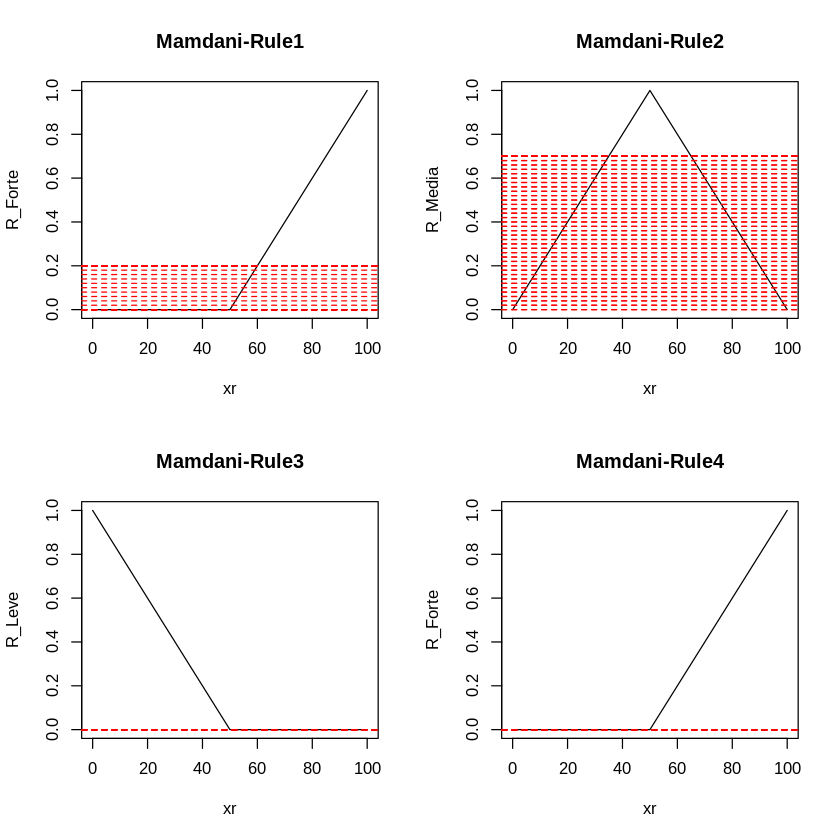

In [12]:

#Mamdani 
par(mfrow=c(2,2))
plot(xr, R_Forte, type="l", ylim=c(0,1))
abline(h=Mamdani1,col="red",lty=2 )
title("Mamdani-Rule1")
plot(xr, R_Media, type="l", ylim=c(0,1))
abline(h=Mamdani2,col="red",lty=2 )
title("Mamdani-Rule2")
plot(xr, R_Leve, type="l", ylim=c(0,1))
abline(h=Mamdani3,col="red",lty=2 )
title("Mamdani-Rule3")
plot(xr, R_Forte, type="l", ylim=c(0,1))
abline(h=Mamdani4,col="red",lty=2 )
title("Mamdani-Rule4")


# Step 5: 
* ** Aggregation: ** aggregation operator combining the results of individual rules.

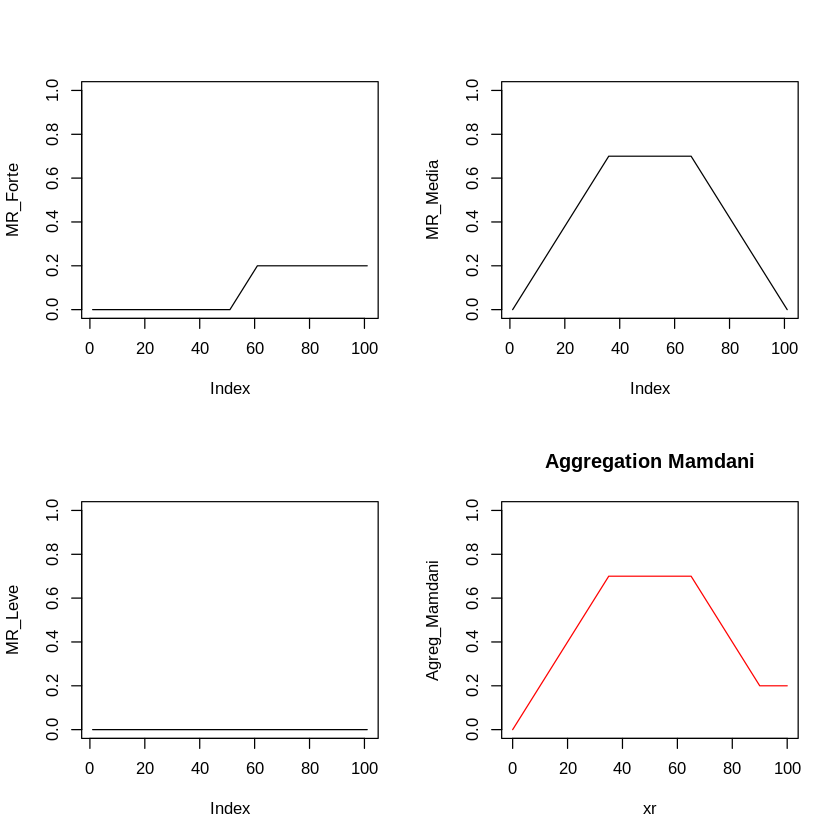

In [13]:
# Aggregation PLOT

MR_Forte<-c()
for(i in 1:length(R_Forte)){
MR_Forte[i]<- max(Mamdani1[i],Mamdani4[i])
    }
MR_Media<-Mamdani2
MR_Leve<-Mamdani3

##################Aggregation

Agreg_Mamdani<-c()
for(i in 1:length(R_Forte)){
  
  Agreg_Mamdani[i]<- max(Mamdani1[i],Mamdani2[i], Mamdani3[i],Mamdani4[i])
  }

####plot
par(mfrow=c(2,2))
plot(MR_Forte,  type="l", ylim=c(0,1))
plot(MR_Media,  type="l", ylim=c(0,1))
plot(MR_Leve,  type="l", ylim=c(0,1))
plot(xr,Agreg_Mamdani,type="l",ylim=c(0,1), col="red")
title("Aggregation Mamdani")


# Steps 5: 
* ** Desuzzification: ** defuzzification method (Area center and center of maximums.)




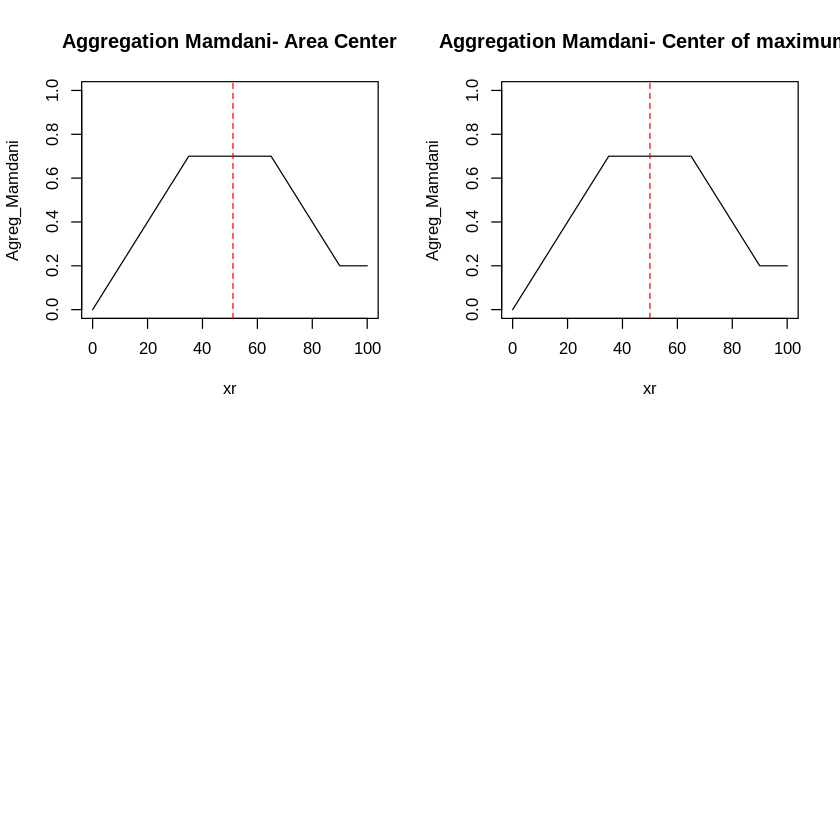

In [14]:
###Area Center
CentA_Mamdani<- sum(Agreg_Mamdani*xr)/ sum(Agreg_Mamdani)
###Center of maximums
CentMax_Mamdani<- (match(max(Agreg_Mamdani), Agreg_Mamdani) -1)
contagem <- rle(Agreg_Mamdani)
nmaxMam<-contagem$lengths[contagem$values==max(Agreg_Mamdani)] -1
CentMax_Mamdani2<- nmaxMam + CentMax_Mamdani
CenMax_MAN<- (CentMax_Mamdani2 + CentMax_Mamdani)/2



####plot
par(mfrow=c(2,2))
plot(xr,Agreg_Mamdani,type="l",ylim=c(0,1))
abline(v=CentA_Mamdani, col="red",lty=2)
title("Aggregation Mamdani- Area Center")

plot(xr,Agreg_Mamdani,type="l",ylim=c(0,1))
abline(v=CenMax_MAN, col="red",lty=2)
title("Aggregation Mamdani- Center of maximums")


* ** Output: **  
Through the inputs: Sales Variation (V) = 55, service Overload (S)= 60,  and Informatization Level (I)= 85, were obtained as output to Investment recommendation (R) to: 


In [15]:
cat("Center of maximums Mamdani:", CenMax_MAN,"\n")
cat("Center of maximums Larsen:", CentMax_Larsen,"\n")


Center of maximums Mamdani: 50 
Center of maximums Larsen: 50 
